# 🍷 Wine Quality ML Dashboard - Análisis de Componentes Principales (PCA)

---
**Autor:** Daniel Mardones  
**Proyecto:** Visualización y Machine Learning aplicado a la calidad del vino

## Descripción
Este notebook realiza un análisis de componentes principales (PCA) sobre el dataset de calidad de vino para identificar las variables más relevantes y visualizar la reducción de dimensionalidad.

## Objetivos
- Realizar un análisis exploratorio detallado (EDA) del dataset.
- Aplicar PCA y visualizar los componentes principales.
- Identificar las variables más importantes para el modelo.
- Visualizar los datos y resultados con diferentes librerías gráficas.
- Extraer insights y recomendaciones para el negocio vitivinícola.

## Estructura
1. Introducción y contexto del problema.
2. EDA: exploración y visualización de datos.
3. Análisis PCA y visualización de componentes.
4. Interpretación, insights y recomendaciones.

---
¡Comencemos!

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar datos
df = pd.read_csv('../data/WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
# EDA rápido
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [4]:
# Preprocesamiento para PCA
features = df.drop(['quality'], axis=1).select_dtypes(include='number')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [5]:
# Aplicar PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
df_pca['quality'] = df['quality']

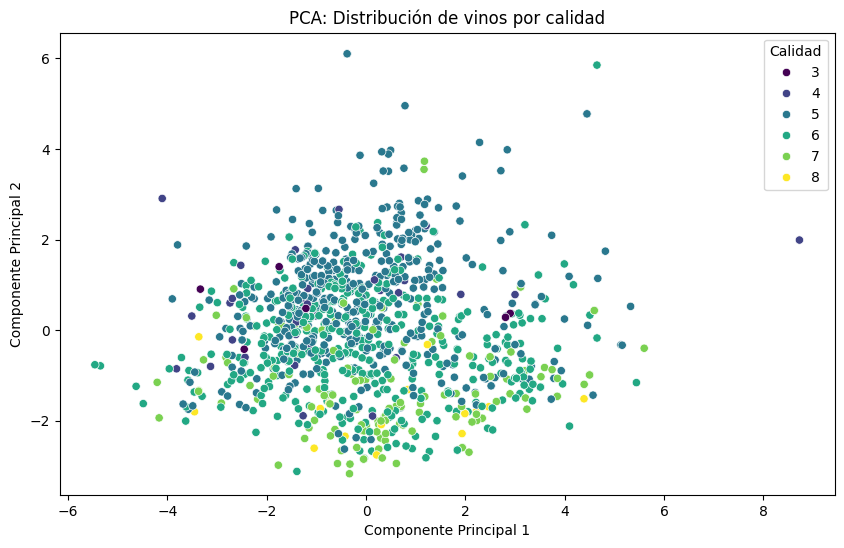

In [6]:
# Visualización de los componentes principales
plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', hue='quality', data=df_pca, palette='viridis')
plt.title('PCA: Distribución de vinos por calidad')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Calidad')
plt.show()

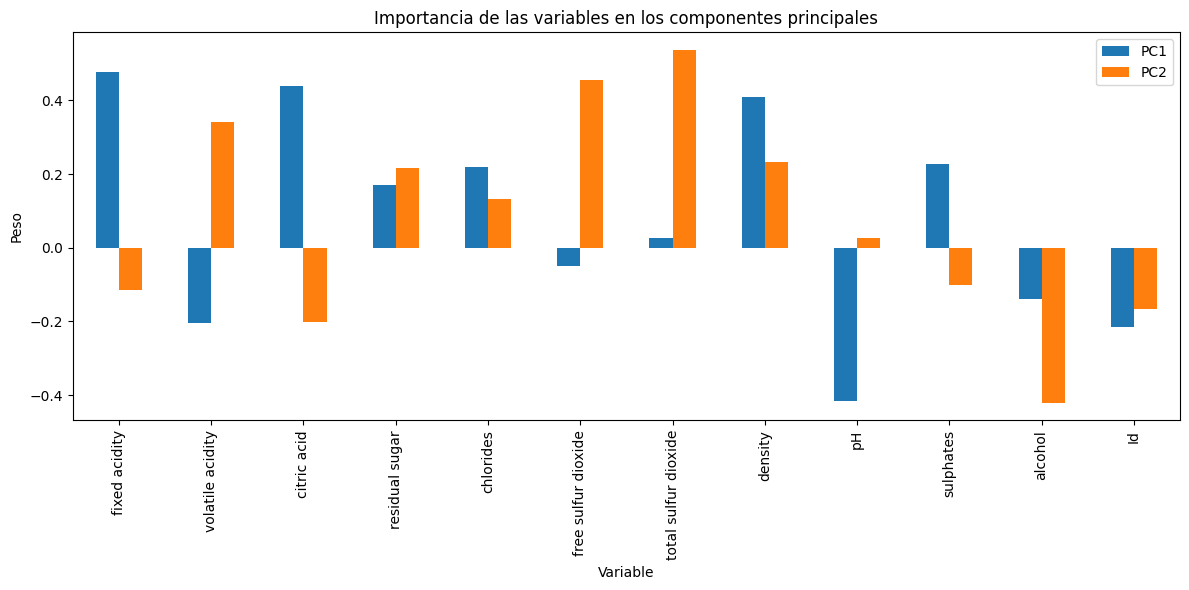

In [7]:
# Importancia de las variables en los componentes principales
importances = pd.DataFrame({'Variable': features.columns, 'PC1': pca.components_[0], 'PC2': pca.components_[1]})
importances.set_index('Variable', inplace=True)
importances.plot(kind='bar', figsize=(12,6))
plt.title('Importancia de las variables en los componentes principales')
plt.ylabel('Peso')
plt.tight_layout()
plt.show()

# Conclusiones y Recomendaciones de Negocio

- El análisis PCA permite reducir la dimensionalidad y visualizar cómo se agrupan los vinos según su calidad.
- Las variables con mayor peso en los componentes principales son las más relevantes para explicar la variabilidad del dataset.
- Recomendación: Enfocar el control de calidad y la optimización de procesos en las variables más influyentes identificadas por PCA.
- El uso de PCA puede ayudar a segmentar productos y mejorar la toma de decisiones en el negocio vitivinícola.